In [2]:
%load_ext autoreload
%autoreload 2

In [30]:
import SimpleITK as sitk

from platipy.imaging.cnn.prob_unet import ProbabilisticUnet

import torch

from platipy.imaging.cnn.dataset import preprocess_image, prepare_transforms

from platipy.imaging import ImageVisualiser

In [5]:
img = sitk.ReadImage("tmpdata/images/Case7.nii.gz")


In [21]:
img_pre = preprocess_image(img, crop_to_mm=320)

In [22]:
sitk.WriteImage(img_pre, "tmp.nii.gz")

In [32]:
transforms = prepare_transforms()

In [44]:
arr = sitk.GetArrayFromImage(img_pre)

for z in range(img_pre.GetSize()[2]):
    
    arr[z,:,:] = transforms(image=arr[z,:,:])




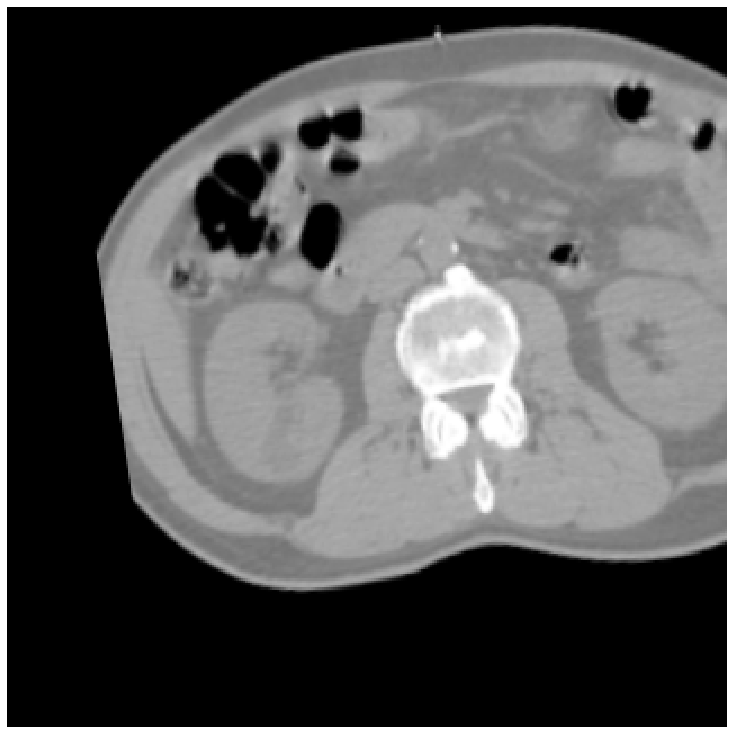

In [56]:
vis = ImageVisualiser(sitk.GetImageFromArray(arr), window=[-1,1], axis="z", cut=56)
fig = vis.show()